In [1]:
#pip install folium

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Step 1: Register and obtain API key from OpenWeatherMap
api_key = "fb365aa6104829b44455572365ff3b4e"

In [4]:

base_url = "http://api.openweathermap.org/data/2.5/forecast"
city_name = "New York"
params = {
"q": city_name,
"appid": api_key,
"units": "metric"
}
response = requests.get(base_url, params=params)
data = response.json()

In [5]:
response

<Response [200]>

In [6]:
data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1731445200,
   'main': {'temp': 11.14,
    'feels_like': 9.46,
    'temp_min': 11.14,
    'temp_max': 11.5,
    'pressure': 1021,
    'sea_level': 1021,
    'grnd_level': 1020,
    'humidity': 44,
    'temp_kf': -0.36},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01d'}],
   'clouds': {'all': 0},
   'wind': {'speed': 7.05, 'deg': 342, 'gust': 11.06},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'd'},
   'dt_txt': '2024-11-12 21:00:00'},
  {'dt': 1731456000,
   'main': {'temp': 10.28,
    'feels_like': 8.46,
    'temp_min': 8.56,
    'temp_max': 10.28,
    'pressure': 1022,
    'sea_level': 1022,
    'grnd_level': 1023,
    'humidity': 42,
    'temp_kf': 1.72},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 0},
   'wind': {'speed': 7.01, 'deg': 346, 'gust': 11.69},
   'visibility': 10000,
   

In [7]:
# Extract relevant weather attributes and timestamps
weather_data = data["list"]
timestamps = [entry["dt"] for entry in weather_data]
temperatures = [entry["main"]["temp"] for entry in weather_data]
humidity = [entry["main"]["humidity"] for entry in weather_data]
wind_speed = [entry["wind"]["speed"] for entry in weather_data]
weather_description = [item['weather'][0]['description'] for item in weather_data]

In [8]:
weather_data

[{'dt': 1731445200,
  'main': {'temp': 11.14,
   'feels_like': 9.46,
   'temp_min': 11.14,
   'temp_max': 11.5,
   'pressure': 1021,
   'sea_level': 1021,
   'grnd_level': 1020,
   'humidity': 44,
   'temp_kf': -0.36},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'clouds': {'all': 0},
  'wind': {'speed': 7.05, 'deg': 342, 'gust': 11.06},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'd'},
  'dt_txt': '2024-11-12 21:00:00'},
 {'dt': 1731456000,
  'main': {'temp': 10.28,
   'feels_like': 8.46,
   'temp_min': 8.56,
   'temp_max': 10.28,
   'pressure': 1022,
   'sea_level': 1022,
   'grnd_level': 1023,
   'humidity': 42,
   'temp_kf': 1.72},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'clouds': {'all': 0},
  'wind': {'speed': 7.01, 'deg': 346, 'gust': 11.69},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'n'},
  'dt_txt': '2024-11-13 00:00:00'},
 {'dt': 1731466800,

In [9]:
# Convert timestamps to pandas datetime objects
datetime_objects = [pd.to_datetime(timestamp, unit="s") for timestamp in timestamps]

In [10]:
# Create a pandas DataFrame with the extracted weather data
weather_df = pd.DataFrame({
'Timestamp': timestamps,
"Datetime": datetime_objects,
'Temperature': temperatures,
'humidity': humidity,
'wind_speed': wind_speed,
'weather_description': weather_description,
})

In [11]:
# Convert the "Datetime" column to a DatetimeIndex
weather_df.set_index("Datetime", inplace=True)

In [12]:
weather_df

,Timestamp,Temperature,humidity,wind_speed,weather_description
Datetime,,,,,
2024-11-12 21:00:00,1731445200,11.14,44,7.05,clear sky
2024-11-13 00:00:00,1731456000,10.28,42,7.01,clear sky
2024-11-13 03:00:00,1731466800,8.25,42,6.14,clear sky
2024-11-13 06:00:00,1731477600,4.97,45,6.35,clear sky
2024-11-13 09:00:00,1731488400,3.94,45,6.28,clear sky
2024-11-13 12:00:00,1731499200,3.37,44,5.36,clear sky
2024-11-13 15:00:00,1731510000,5.69,34,4.46,clear sky
2024-11-13 18:00:00,1731520800,8.64,24,2.49,clear sky
2024-11-13 21:00:00,1731531600,9.42,22,2.08,clear sky


In [13]:
# Calculate total precipitation (rain + snow) for each entry
precipitation = []
for entry in weather_data:
    rain = entry.get("rain", {}).get("3h", 0)
    snow = entry.get("snow", {}).get("3h", 0)
    total_precipitation = rain + snow
    precipitation.append(total_precipitation)

In [14]:
precipitation

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [15]:
# Step 5: Perform data modeling
avg_temp = sum(temperatures) / len(temperatures)
avg_temp

8.60425

In [16]:
max_temp = max(temperatures)
max_temp

14.23

In [17]:
min_temp = min(temperatures)
min_temp

3.37

In [18]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

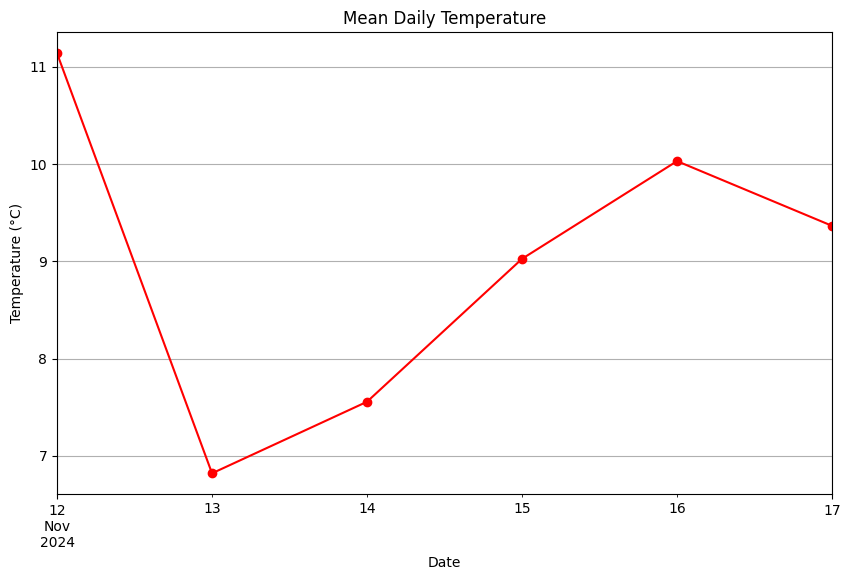

In [19]:
# Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

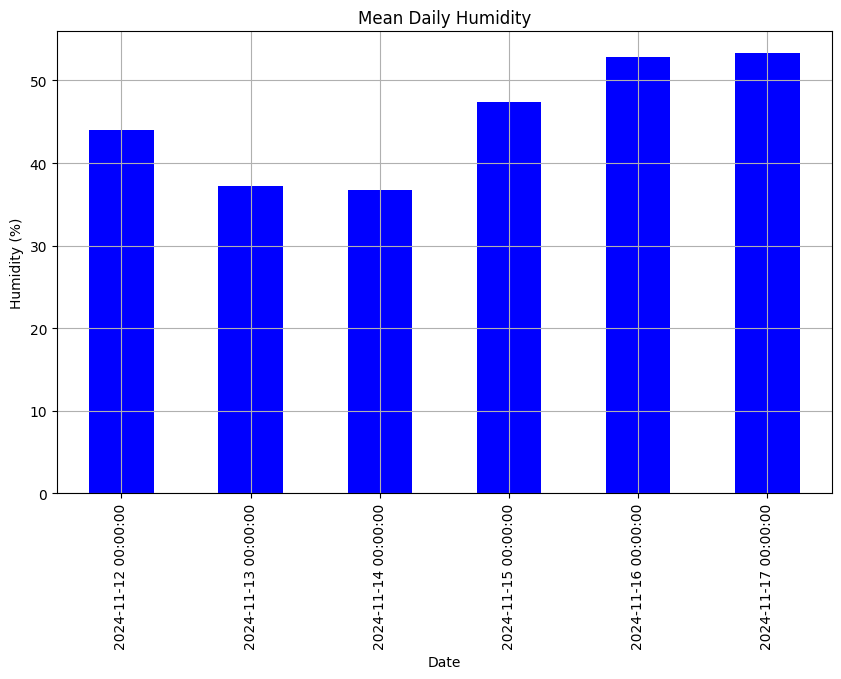

In [20]:
# Plot the mean daily humidity over time (Bar plot)
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

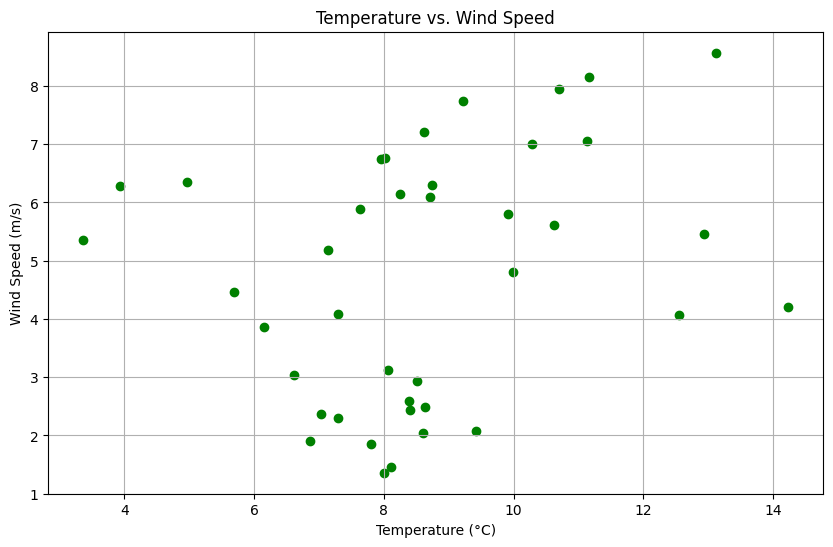

In [21]:
# Plot the relationship between temperature and wind speed (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

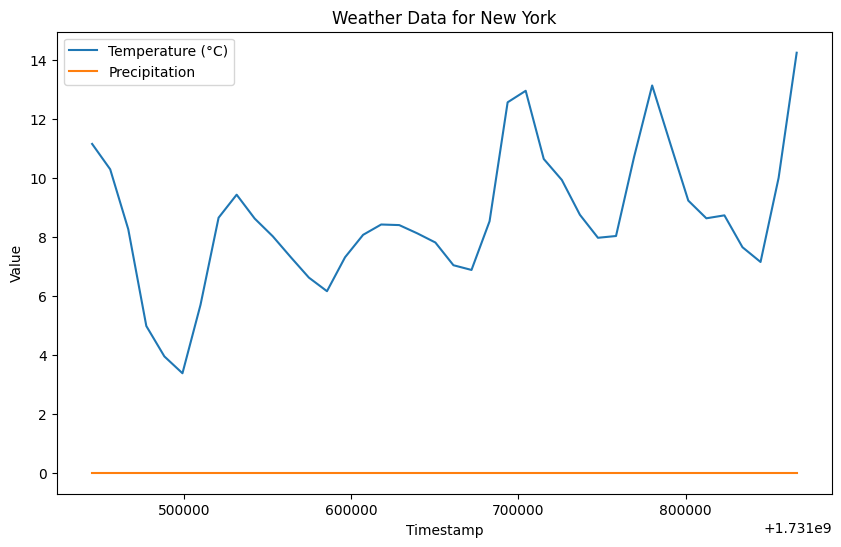

In [22]:
# Step 6: Visualize the weather data
plt.figure(figsize=(10, 6))
plt.plot(timestamps, temperatures, label="Temperature (°C)")
plt.plot(timestamps, precipitation, label="Precipitation")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Weather Data for {}".format(city_name))
plt.legend()
plt.show()

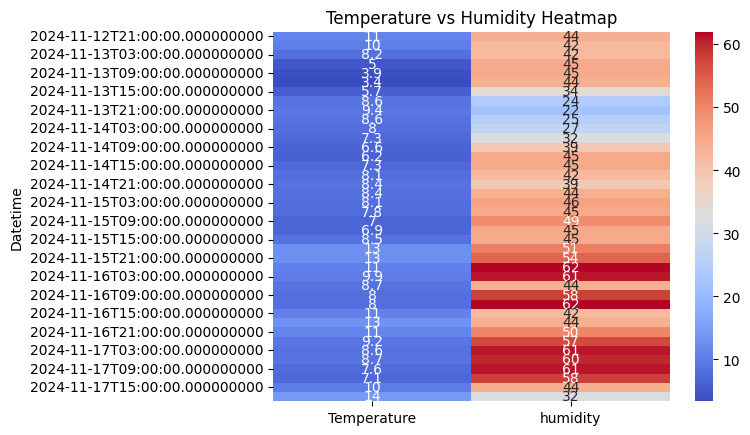

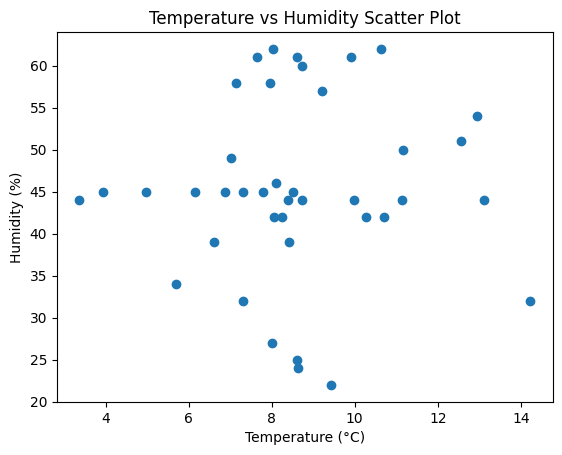

In [23]:
import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()
# Create a scatter plot to visualize the relationship between temperature and humid
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()

In [28]:
location_df = pd.DataFrame({
        'Location': [location],
        'Temperature': [temperature],
        'Humidity': [humidity],
        'Wind Speed': [wind_speed],
        'Latitude': [latitude],
        'Longitude': [longitude]
    })
location_df
# Append the current location's weather data to the main DataFrame
  # weather_df = weather_df(data=location_df)

,Location,Temperature,Humidity,Wind Speed,Latitude,Longitude
0,New York,284.58,43,9.26,40.7143,-74.006
